In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Getting the data

In [2]:
# Path to the data directory
data_dir = Path("data/train_data")

In [3]:
# Get list of all the images
images = list(map(str, list(data_dir.glob("*.png"))))
images

['data/train_data/aWRK_5f1ee509dd075.png',
 'data/train_data/UgNr_5f1f23c30348f.png',
 'data/train_data/Gt6n_5f1ee2fa336f1.png',
 'data/train_data/w5rs_5f1f1db8dff84.png',
 'data/train_data/R7zp_5f1ee27c5f518.png',
 'data/train_data/5tle_5f1ee35297058.png',
 'data/train_data/L5Z4_5f1ee6cbe079a.png',
 'data/train_data/wmFd_5f1f2309d7378.png',
 'data/train_data/3A7n_5f1f1f5602b49.png',
 'data/train_data/frFd_5f1f1f7a73575.png',
 'data/train_data/wAFd_5f1f28412d8c4.png',
 'data/train_data/v236_5f1ee65903c89.png',
 'data/train_data/DzE5_5f1f243fa09b7.png',
 'data/train_data/sLNe_5f1f2036c1eff.png',
 'data/train_data/NzKU_5f1ee8f84a2a8.png',
 'data/train_data/K2CW_5f1ee72f7f95d.png',
 'data/train_data/RubH_5f1ee8f358061.png',
 'data/train_data/62YP_5f1ee2cbacf2c.png',
 'data/train_data/tVCP_5f1f25a848fa5.png',
 'data/train_data/6uFG_5f1ee36384017.png',
 'data/train_data/A8Sb_5f1f1dfaaeb97.png',
 'data/train_data/HV4e_5f1f1c9e2420a.png',
 'data/train_data/wVkZ_5f1ee30fedd02.png',
 'data/trai

Shape of image:  (80, 215, 3)
Shape of image:  (80, 215, 3)
Shape of image:  (80, 215, 3)
Shape of image:  (80, 215, 3)


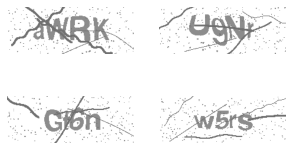

In [4]:
# Samples
sample_images = images[:4]
_,ax = plt.subplots(2,2, figsize=(5,3))
for i in range(4):
    img = cv2.imread(str(sample_images[i]))
    print("Shape of image: ", img.shape)
    ax[i//2, i%2].imshow(img)
    ax[i//2, i%2].axis('off')
plt.show()

In [5]:
labels = [img.split(os.path.sep)[-1].split("_")[0] for img in images]
labels

['aWRK',
 'UgNr',
 'Gt6n',
 'w5rs',
 'R7zp',
 '5tle',
 'L5Z4',
 'wmFd',
 '3A7n',
 'frFd',
 'wAFd',
 'v236',
 'DzE5',
 'sLNe',
 'NzKU',
 'K2CW',
 'RubH',
 '62YP',
 'tVCP',
 '6uFG',
 'A8Sb',
 'HV4e',
 'wVkZ',
 'mE4c',
 'dCbt',
 'yBWa',
 'eeZP',
 '858Y',
 'TpFs',
 'HBBp',
 'NcUp',
 'Ycuz',
 '6KG7',
 '9bMk',
 'NS49',
 'wg6F',
 'z5RA',
 'YvmK',
 'p3BU',
 'CKBs',
 'fUk3',
 'L2Ul',
 'aapC',
 'sGP3',
 'SpMC',
 '6Wzu',
 'FpKt',
 'ShAK',
 'aSN6',
 'D97p',
 'g2ck',
 'eRCN',
 'YhhR',
 'bSKG',
 'eWrY',
 '66DA',
 'y97D',
 'alYH',
 'Dftn',
 'MdMR',
 'rSrl',
 'gfTN',
 'wvrL',
 'TLm9',
 'yDkT',
 '5URM',
 'ZwgU',
 'P74h',
 'n7md',
 'LRhL',
 'l7Rw',
 'VKSK',
 '8HWp',
 'RM4g',
 '9rbm',
 'S4lG',
 'gz9k',
 'MTmS',
 'MkZ7',
 'Gzh6',
 '4RmZ',
 '3Czg',
 'YDnv',
 'sNy3',
 'EzSC',
 'ctR5',
 'e7lm',
 'dpTe',
 '9FBC',
 'lGRA',
 'ARM7',
 'p3EG',
 'hadh',
 'BRnf',
 'ldH2',
 'sGsU',
 'zgdh',
 'dgtt',
 'baUN',
 'GV3B',
 'A8du',
 'tHfa',
 'UZBG',
 'vzkG',
 'slNT',
 'y72T',
 'MLrz',
 'S4Um',
 'cZw8',
 'VfWa',
 'zCYm',
 

In [6]:
characters = sorted(set(char for label in labels for char in label))
characters

['2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'K',
 'L',
 'M',
 'N',
 'P',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'k',
 'l',
 'm',
 'n',
 'p',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'y',
 'z']

## Dataset Info

In [7]:
print("Number of images found: ", len(images))
print("Number of labels found: ", len(labels))
print("Number of unique characters: ", len(characters))
print("Characters present: ", characters)

Number of images found:  50000
Number of labels found:  50000
Number of unique characters:  50
Characters present:  ['2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'K', 'L', 'M', 'N', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y', 'z']


## Requirements

In [8]:
# Batch size for training and validation
batch_size = 16

In [9]:
# Desired image dimensions
img_width = 215
img_height = 80

In [10]:
# Factor by which the image is going to be downsampled
# by the convolutional blocks. We will be using two
# convolution blocks and each block will have
# a pooling layer which downsample the features by a factor of 2.
# Hence total downsampling factor would be 4.
downsample_factor = 4

In [11]:
# Maximum length of any captcha in the dataset
max_length = max([len(label) for label in labels])
max_length

4

## Preprocessing

In [12]:
# Mapping characters to integers
char_to_num = layers.experimental.preprocessing.StringLookup(
    vocabulary=list(characters), mask_token=None
)
char_to_num

In [13]:
# Mapping integers back to original characters
num_to_char = layers.experimental.preprocessing.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)
num_to_char

## Create training and validation sets

In [14]:
def split_data(images, labels, train_size=0.9, shuffle=True):
    # 1. Get the total size of the dataset
    size = len(images)
    # 2. Make an indices array and shuffle it, if required
    indices = np.arange(size)
    if shuffle:
        np.random.shuffle(indices)
    # 3. Get the size of training samples
    train_samples = int(size * train_size)
    # 4. Split data into training and validation sets
    x_train, y_train = images[indices[:train_samples]], labels[indices[:train_samples]]
    x_valid, y_valid = images[indices[train_samples:]], labels[indices[train_samples:]]
    return x_train, x_valid, y_train, y_valid

In [15]:
# Splitting data into training and validation sets
x_train, x_valid, y_train, y_valid = split_data(np.array(images), np.array(labels))

In [16]:
y_train

array(['A9LF', 'FkSG', 'naNp', ..., 'pwcu', '4pyp', 'NW3R'], dtype='<U4')

In [17]:
x_train

array(['data/train_data/A9LF_5f1f1c648ce85.png',
       'data/train_data/FkSG_5f1f1defa5333.png',
       'data/train_data/naNp_5f1ee686e84dc.png', ...,
       'data/train_data/pwcu_5f1ee2cd0a161.png',
       'data/train_data/4pyp_5f1f1c62e8642.png',
       'data/train_data/NW3R_5f1ee41570376.png'], dtype='<U38')

## Encode image

In [18]:
def encode_single_sample(img_path, label):
    # 1. Read image
    img = tf.io.read_file(img_path)
    # 2. Decode and convert to grayscale
    img = tf.io.decode_png(img, channels=1)
    # 3. Convert to float32 in [0, 1] range
    img = tf.image.convert_image_dtype(img, tf.float32)
    # 4. Resize to the desired size
    img = tf.image.resize(img, [img_height, img_width])
    # 5. Transpose the image because we want the time
    # dimension to correspond to the width of the image.
    img = tf.transpose(img, perm=[1, 0, 2])
    # 6. Map the characters in label to numbers
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
    # 7. Return a dict as our model is expecting two inputs
    return {"image": img, "label": label}

In [19]:
y_train[0]

'A9LF'

In [20]:
encode_single_sample(x_train[0], y_train[0])

{'image': <tf.Tensor: shape=(215, 80, 1), dtype=float32, numpy=
 array([[[1.        ],
         [0.43921572],
         [0.45882356],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],
 
        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],
 
        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],
 
        ...,
 
        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],
 
        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],
 
        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.     

In [21]:
encode_single_sample(x_train[0], y_train[0])['image'].dtype

tf.float32

## Create Dataset Objects

In [22]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (
    train_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
)
train_dataset

<PrefetchDataset shapes: {image: (None, 215, 80, 1), label: (None, None)}, types: {image: tf.float32, label: tf.int64}>

In [23]:
validation_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
validation_dataset = (
    validation_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
)
validation_dataset

<PrefetchDataset shapes: {image: (None, 215, 80, 1), label: (None, None)}, types: {image: tf.float32, label: tf.int64}>

## Visualize the data

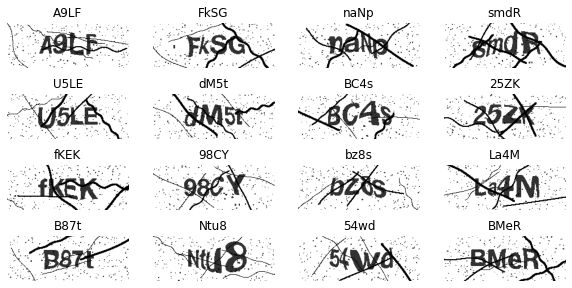

In [24]:
_, ax = plt.subplots(4, 4, figsize=(10, 5))
for batch in train_dataset.take(1):
    images = batch["image"]
    labels = batch["label"]
    for i in range(16):
        img = (images[i] * 255).numpy().astype("uint8")
        label = tf.strings.reduce_join(num_to_char(labels[i])).numpy().decode("utf-8")
        ax[i // 4, i % 4].imshow(img[:, :, 0].T, cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")
plt.show()

## Model

In [25]:
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions
        return y_pred

In [26]:
def build_model():
    # Inputs to the model
    input_img = layers.Input(
        shape=(img_width, img_height, 1), name="image", dtype="float32"
    )
    labels = layers.Input(name="label", shape=(None,), dtype="float32")

    # First conv block
    x = layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(input_img)
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block
    x = layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
    x = layers.MaxPooling2D((2, 2), name="pool2")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model
    new_shape = ((img_width // 4), (img_height // 4) * 64)
    x = layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = layers.Dense(64, activation="relu", name="dense1")(x)
    x = layers.Dropout(0.2)(x)

    # RNNs
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

    # Output layer
    x = layers.Dense(
        len(char_to_num.get_vocabulary()) + 1, activation="softmax", name="dense2"
    )(x)

    # Add CTC layer for calculating CTC loss at each step
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="ocr_model_v1"
    )
    # Optimizer
    sgd = keras.optimizers.SGD(learning_rate=0.002,
                               decay=1e-6,
                               momentum=0.9,
                               nesterov=True,
                               clipnorm=5)
    # Compile the model and return
    model.compile(optimizer=sgd)
    return model

In [27]:
# Get the model
model = build_model()
model.summary()

Model: "ocr_model_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image (InputLayer)              [(None, 215, 80, 1)] 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 215, 80, 32)  320         image[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 107, 40, 32)  0           Conv1[0][0]                      
__________________________________________________________________________________________________
Conv2 (Conv2D)                  (None, 107, 40, 64)  18496       pool1[0][0]                      
_______________________________________________________________________________________

## Training

In [28]:
epochs = 200
early_stopping_patience = 10
# Add early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=early_stopping_patience, restore_best_weights=True
)

In [29]:
# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[early_stopping],
)

Epoch 1/200
2813/2813 [==============================] - 535s 190ms/step - loss: 16.6072 - val_loss: 16.1766
Epoch 2/200
2813/2813 [==============================] - 615s 219ms/step - loss: 16.1503 - val_loss: 16.1312
Epoch 3/200
2813/2813 [==============================] - 619s 220ms/step - loss: 16.1364 - val_loss: 16.1263
Epoch 4/200
2813/2813 [==============================] - 604s 215ms/step - loss: 16.1329 - val_loss: 16.1242
Epoch 5/200
2813/2813 [==============================] - 610s 217ms/step - loss: 16.1321 - val_loss: 16.1242
Epoch 6/200
2813/2813 [==============================] - 567s 202ms/step - loss: 16.1314 - val_loss: 16.1229
Epoch 7/200
2813/2813 [==============================] - 617s 220ms/step - loss: 16.1304 - val_loss: 16.1222
Epoch 8/200
2813/2813 [==============================] - 632s 225ms/step - loss: 16.1295 - val_loss: 16.1223
Epoch 9/200
2813/2813 [==============================] - 616s 219ms/step - loss: 16.1296 - val_loss: 16.1222
Epoch 10/200
2813/2

2813/2813 [==============================] - 472s 168ms/step - loss: 0.3370 - val_loss: 0.2280
Epoch 77/200
2813/2813 [==============================] - 472s 168ms/step - loss: 0.3215 - val_loss: 0.2673
Epoch 78/200
2813/2813 [==============================] - 474s 168ms/step - loss: 0.3170 - val_loss: 0.2462
Epoch 79/200
2813/2813 [==============================] - 475s 169ms/step - loss: 0.3160 - val_loss: 0.2579
Epoch 80/200
2813/2813 [==============================] - 476s 169ms/step - loss: 0.3121 - val_loss: 0.2163
Epoch 81/200
2813/2813 [==============================] - 478s 170ms/step - loss: 0.3138 - val_loss: 0.1968
Epoch 82/200
2813/2813 [==============================] - 476s 169ms/step - loss: 0.3069 - val_loss: 0.1988
Epoch 83/200
2813/2813 [==============================] - 477s 169ms/step - loss: 0.2990 - val_loss: 0.2231
Epoch 84/200
2813/2813 [==============================] - 477s 169ms/step - loss: 0.2965 - val_loss: 0.2425
Epoch 85/200
2813/2813 [=================

## Inference

In [30]:
# Get the prediction model by extracting layers till the output layer
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)
prediction_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           [(None, 215, 80, 1)]      0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 215, 80, 32)       320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 107, 40, 32)       0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 107, 40, 64)       18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 53, 20, 64)        0         
_________________________________________________________________
reshape (Reshape)            (None, 53, 1280)          0         
_________________________________________________________________
dense1 (Dense)               (None, 53, 64)           

## Predictions

In [31]:
# A utility function to decode the output of the network
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_length
    ]
    # Iterate over the results and get back the text
    output_text = []
    for res in results:
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text

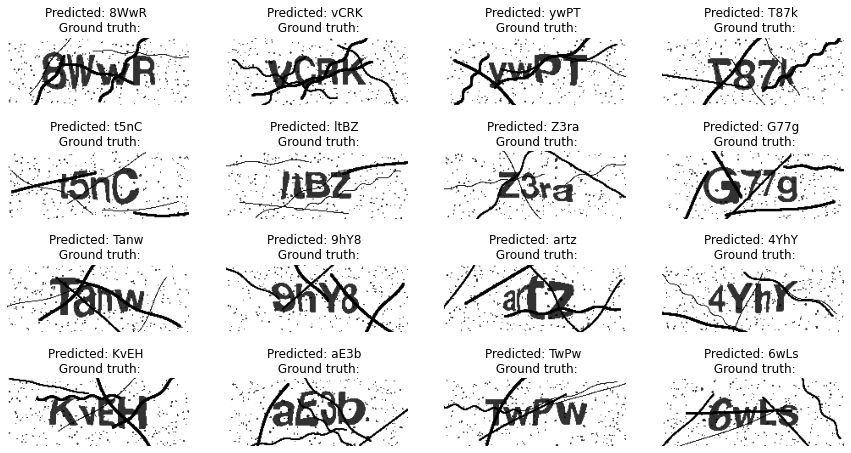

In [42]:
#  Let's check results on some validation samples
for batch in validation_dataset.take(1):
    batch_images = batch["image"]
    batch_labels = batch["label"]

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    orig_texts = []
    for label in batch_labels:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        orig_texts.append(label)

    _, ax = plt.subplots(4, 4, figsize=(15, 8))
    for i in range(len(pred_texts)):
        img = (batch_images[i, :, :, 0] * 255).numpy().astype(np.uint8)
        img = img.T
        title = f"Predicted: {pred_texts[i]} \n Ground truth:"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")
        
plt.show()

## Validation

In [43]:
data_dir = Path("data/test_data")
validation_images = list(map(str, list(data_dir.glob("*.png"))))
validation_images = tf.data.Dataset.from_tensor_slices((validation_images))
validation_images

<TensorSliceDataset shapes: (), types: tf.string>

In [ ]:
for image in validation_images[0:15]:

    preds = prediction_model.predict(image)
    pred_texts = decode_batch_predictions(preds)

    _, ax = plt.subplots(4, 4, figsize=(15, 8))
    for i in range(len(pred_texts)):
        img = (batch_images[i, :, :, 0] * 255).numpy().astype(np.uint8)
        img = img.T
        title = f"Predicted: {pred_texts[i]} \n Ground truth:"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")
        
plt.show()